## Results from coordination games

In [1]:
import pandas as pd
import numpy as np
import mesa
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Import the game
from coordination_game import coordination_agent, coordination_model

# Graphs font
plt.rcParams['font.family'] = 'Georgia'
color_dict = {
    'Anti - environment': 'orange',
    'Neutral': 'blue',
    'Pro - environment': 'green'
}

## Status

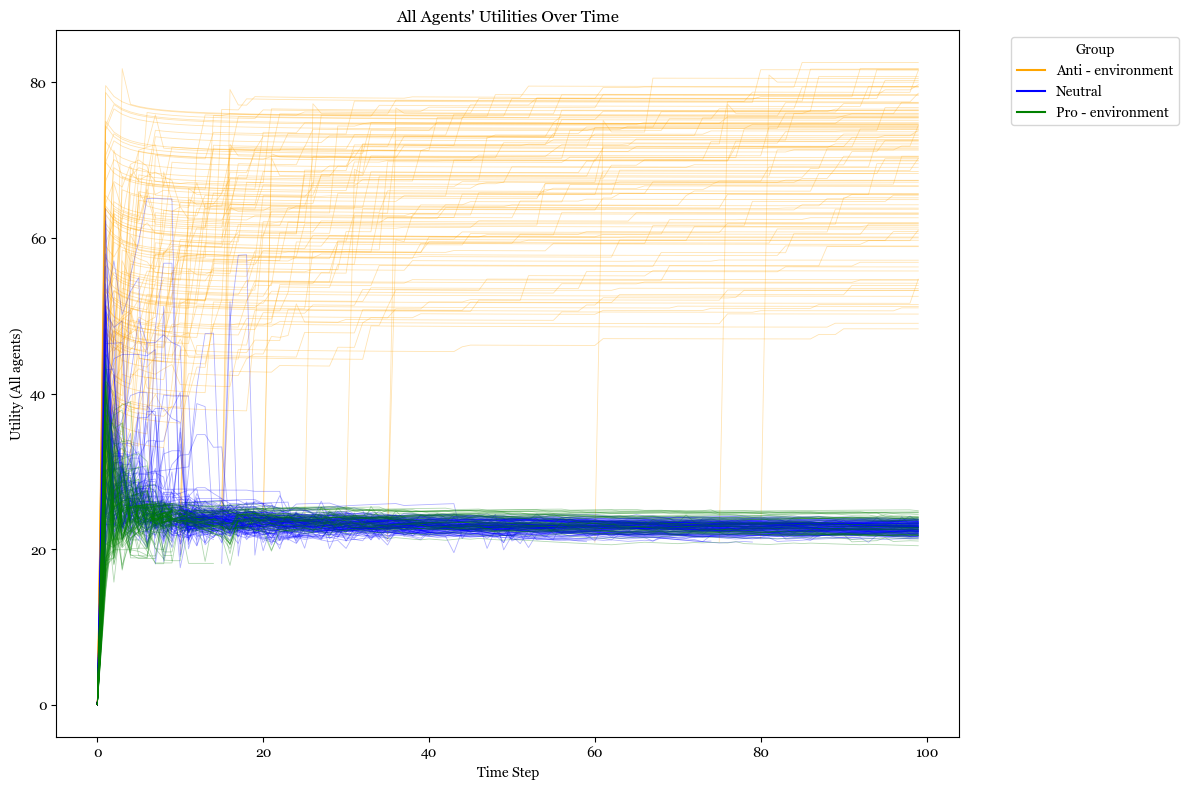

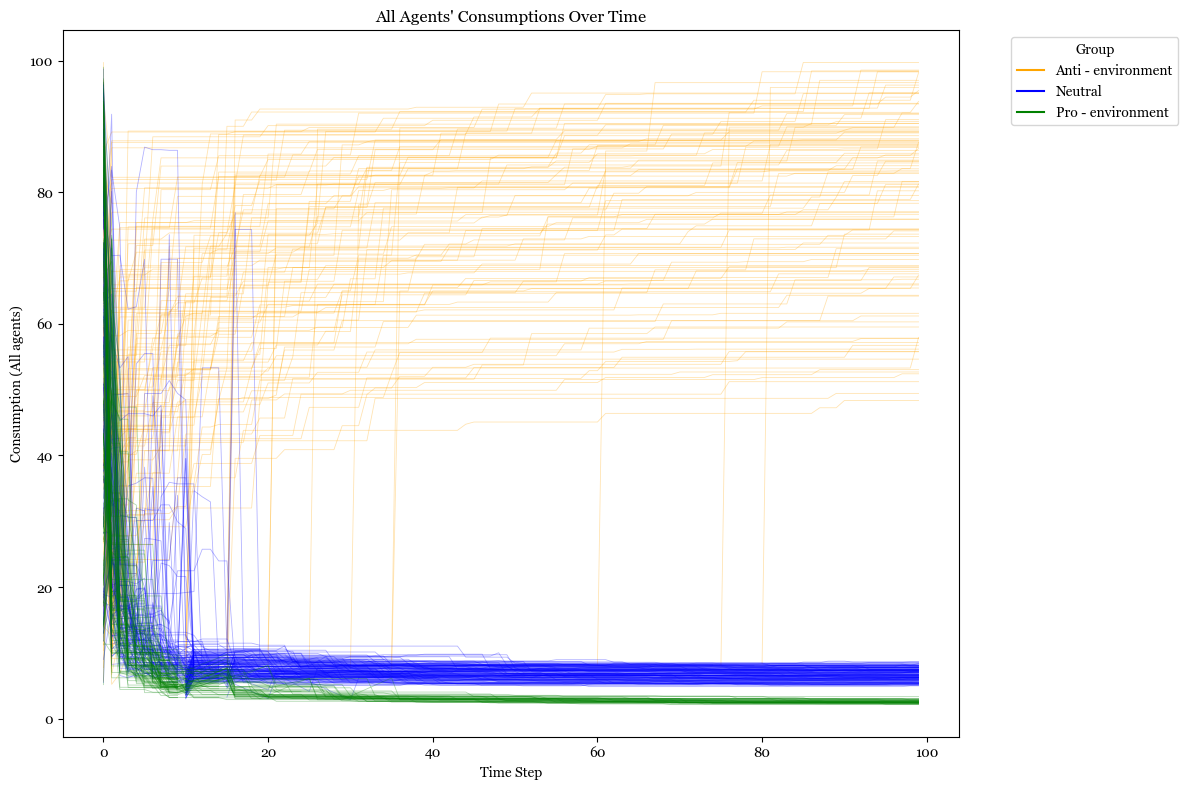

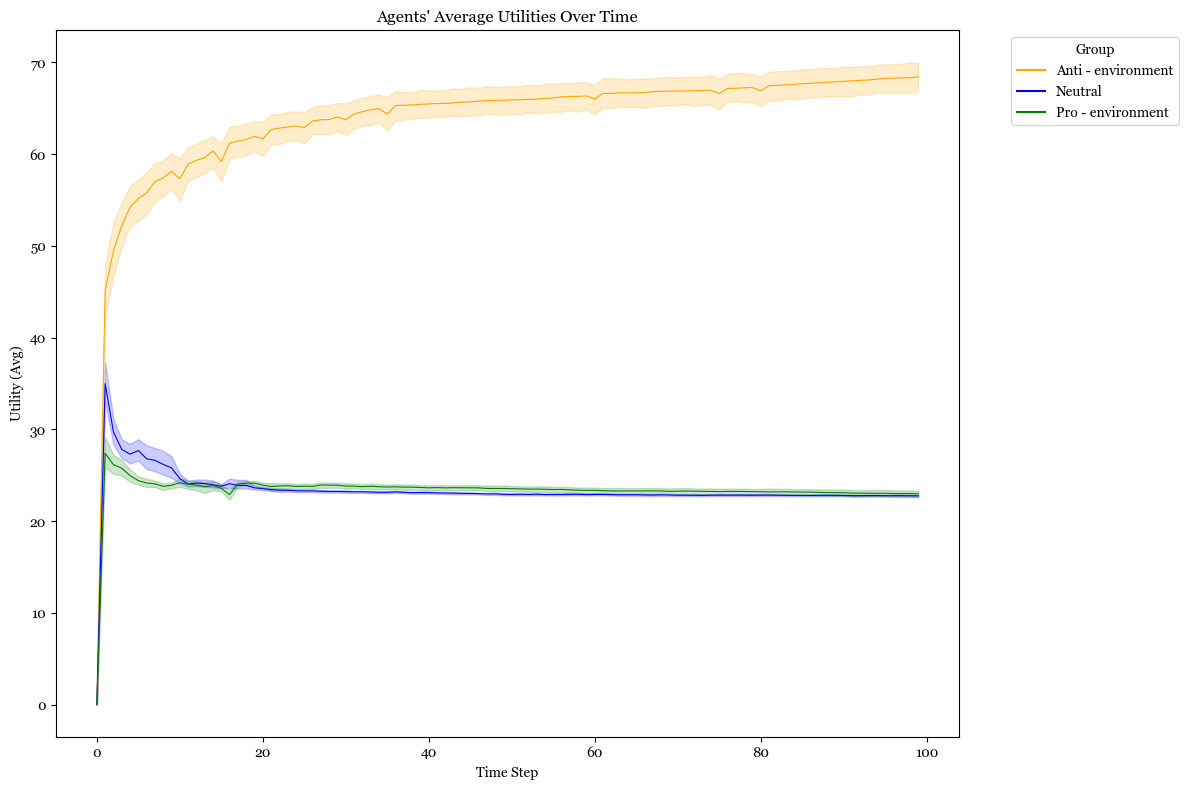

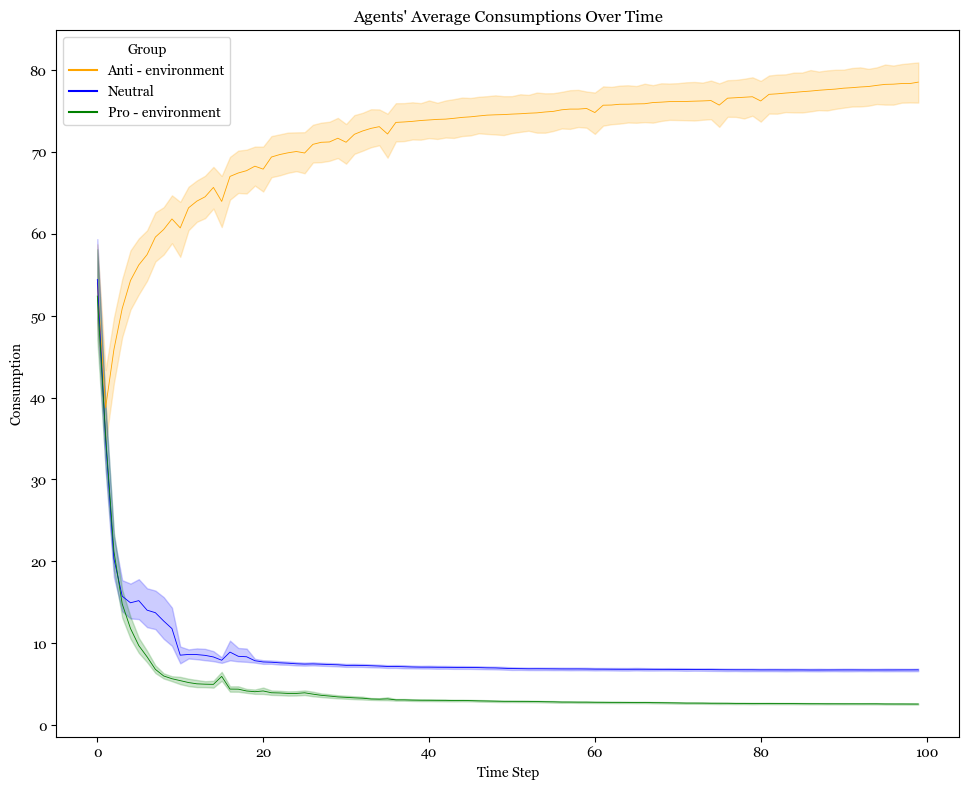

In [2]:
# Set the number of agents and other parameters
N = 300  # Number of agents
lambda1 = 1/2
lambda2 = 1/3
convincement_type = "ranking_relatives"  # Placeholder since you're ignoring this for now

# Initialize the model
model = coordination_model(N, lambda1, lambda2, convincement_type, steps_convincement=5)

# Run the model for a specified number of steps
num_steps = 100
for i in range(num_steps):
    model.step()


# Retrieve the collected data
agent_data = model.datacollector.get_agent_vars_dataframe()

# Reset index to get agent IDs and steps as columns
agent_data = agent_data.reset_index()

# Ensure no missing values in Utilities (fill with 0 if needed)
agent_data['Utility'] = agent_data['Utility'].fillna(0)

# Plot all agents' utilities over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Utility', hue='Group', legend='full', linewidth=0.6, alpha = 0.3, estimator=None, palette= color_dict)
plt.title("All Agents' Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 0.3, estimator=None, palette= color_dict)
plt.title("All Agents' Consumptions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Consumption (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Group data by Step and Group for utilities
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Utility', hue='Group', legend='full', linewidth=0.8, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (Avg)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Consumptions Over Time")
plt.xlabel("Time Step")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.legend(title='Group')
plt.show()


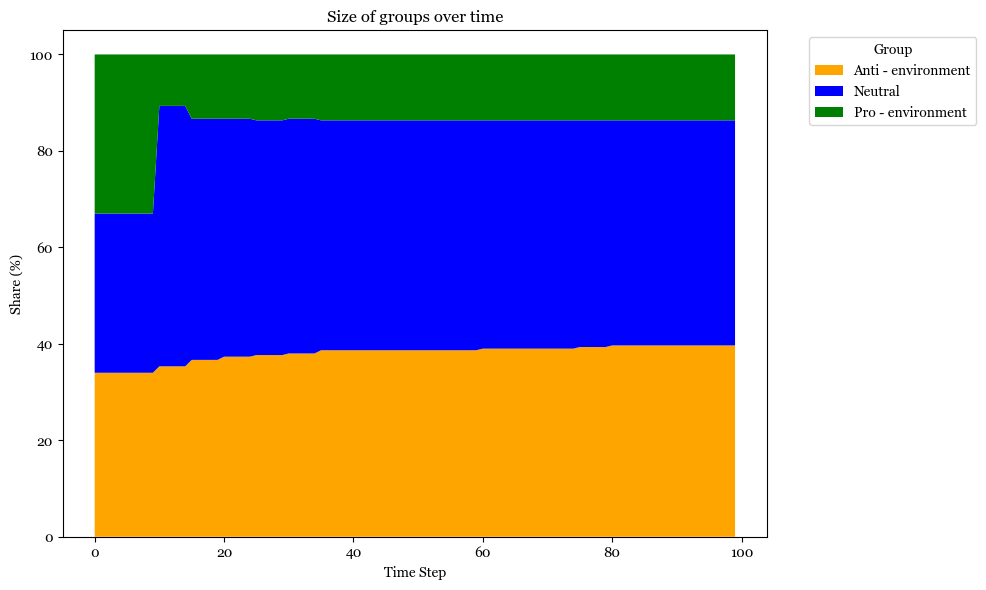

In [3]:
# Count the number of individuals in each group at each `Step`
group_shares = agent_data.groupby(['Step', 'Group'])['AgentID'].count().reset_index()

# Normalize the counts within each `Step` to get shares
group_shares['Share'] = group_shares['AgentID'].apply(lambda x: x * 100 / N)

# Pivot the data to ensure all steps have entries for each group, filling missing values with zero
pivoted_shares = group_shares.pivot(index='Step', columns='Group', values='Share').fillna(0)

# Extract the data for plotting, ensuring they align with `Step`
steps_stack = pivoted_shares.index.tolist()
anti_stack = pivoted_shares.get('Anti - environment', 0).tolist()
neutral_stack = pivoted_shares.get('Neutral', 0).tolist()
pro_stack = pivoted_shares.get('Pro - environment', 0).tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.stackplot(
    steps_stack, 
    anti_stack, 
    neutral_stack, 
    pro_stack, 
    labels=['Anti - environment', 'Neutral', 'Pro - environment'], 
    colors=[color_dict['Anti - environment'], color_dict['Neutral'], color_dict['Pro - environment']]
)
plt.title("Size of groups over time")
plt.xlabel("Time Step")
plt.ylabel("Share (%)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Multiple runs: Different lambdas

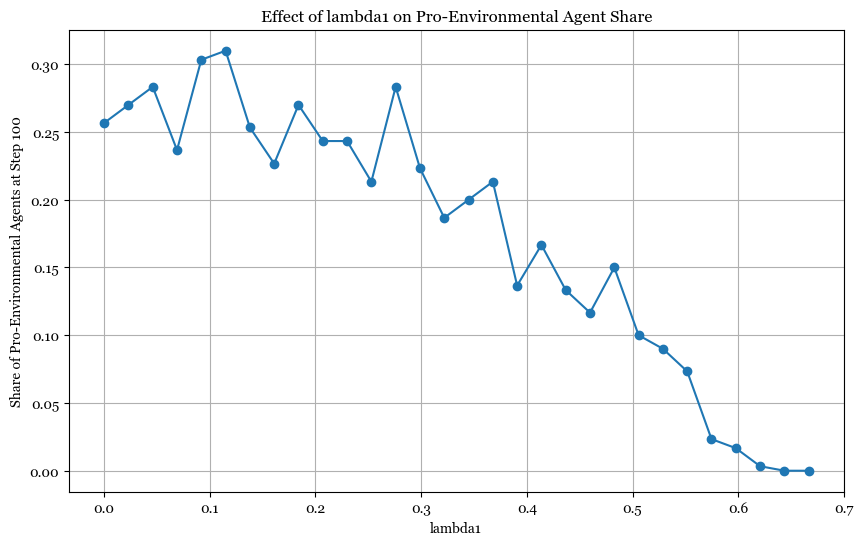

In [4]:
# Set the number of agents and other parameters
N = 300  # Number of agents
lambda2 = 1/3
convincement_type = "ranking_relatives"
num_steps = 100
steps_convincement = 5

# Define a range of lambda1 values from 0 to (1 - lambda2)
lambda1_values = np.linspace(0, 1 - lambda2, num=30)  # Adjust the number of points as needed

# Lists to store results
lambda1_list = []
pro_env_shares = []

# Iterate over the lambda1 values
for lambda1 in lambda1_values:
    # Initialize the model with the current lambda1
    model = coordination_model(N, lambda1, lambda2, convincement_type, steps_convincement)
    
    # Run the model for the specified number of steps
    for i in range(num_steps):
        model.step()
    
    # Retrieve the collected data
    agent_data = model.datacollector.get_agent_vars_dataframe().reset_index()
    
    # Get the data from the last step
    try:
        share_pro_env = agent_data.loc[agent_data['Step'] == num_steps - 1].Group.value_counts(normalize=True)["Pro - environment"]
    except KeyError:
        share_pro_env = 0
    
    # Store the lambda1 and share
    lambda1_list.append(lambda1)
    pro_env_shares.append(share_pro_env)


# Now plot the results
plt.figure(figsize=(10, 6))
plt.plot(lambda1_list, pro_env_shares, marker='o', linestyle='-')
plt.xlabel('lambda1')
plt.ylabel('Share of Pro-Environmental Agents at Step {}'.format(num_steps))
plt.title('Effect of lambda1 on Pro-Environmental Agent Share')
plt.grid(True)
plt.show()




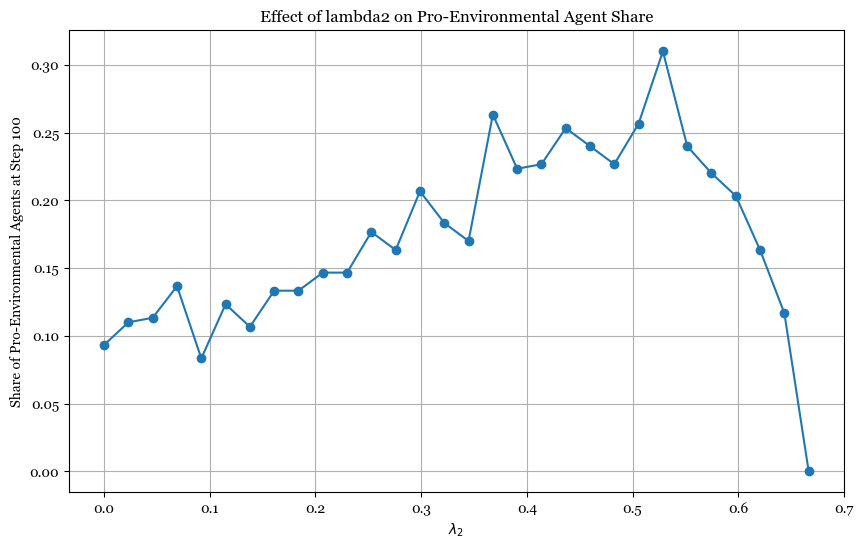

In [6]:
# Set the number of agents and other parameters
N = 300  # Number of agents
lambda1 = 1/3
convincement_type = "ranking_relatives"
num_steps = 100
steps_convincement = 5

# Define a range of lambda2 values from 0 to (1 - lambda1)
lambda2_values = np.linspace(0, 1 - lambda1, num=30)  # Adjust the number of points as needed

# Lists to store results
lambda2_list = []
pro_env_shares = []

# Iterate over the lambda1 values
for lambda2 in lambda2_values:
    # Initialize the model with the current lambda1
    model = coordination_model(N, lambda1, lambda2, convincement_type, steps_convincement)
    
    # Run the model for the specified number of steps
    for i in range(num_steps):
        model.step()
    
    # Retrieve the collected data
    agent_data = model.datacollector.get_agent_vars_dataframe().reset_index()
    
    # Get the data from the last step
    try:
        share_pro_env = agent_data.loc[agent_data['Step'] == num_steps - 1].Group.value_counts(normalize=True)["Pro - environment"]
    except KeyError:
        share_pro_env = 0
    
    # Store the lambda1 and share
    lambda2_list.append(lambda2)
    pro_env_shares.append(share_pro_env)


# Now plot the results
plt.figure(figsize=(10, 6))
plt.plot(lambda2_list, pro_env_shares, marker='o', linestyle='-')
plt.xlabel('$\lambda_2$')
plt.ylabel('Share of Pro-Environmental Agents at Step {}'.format(num_steps))
plt.title('Effect of lambda2 on Pro-Environmental Agent Share')
plt.grid(True)
plt.show()